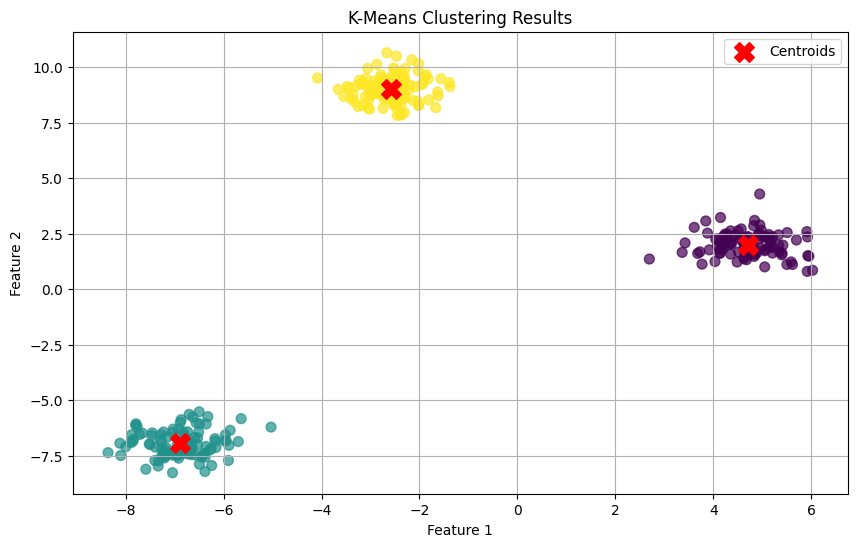

Silhouette Score: 0.908

Cluster Centers:
Cluster 1: [4.70421356 1.99562444]
Cluster 2: [-6.88217395 -6.94243433]
Cluster 3: [-2.58361866  9.03185632]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

class KMeans:
    def __init__(self, k=3, max_iterations=100):
        self.k = k
        self.max_iterations = max_iterations
        self.centroids = None
        self.labels = None

    def initialize_centroids(self, X):
        """Randomly initialize centroids from data points"""
        random_indices = np.random.choice(X.shape[0], self.k, replace=False)
        return X[random_indices]

    def assign_clusters(self, X):
        """Assign each data point to the nearest centroid"""
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def update_centroids(self, X, labels):
        """Update centroids as the mean of assigned points"""
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.k)])
        return new_centroids

    def fit(self, X):
        """Train the K-Means model"""
        self.centroids = self.initialize_centroids(X)

        for _ in range(self.max_iterations):
            self.labels = self.assign_clusters(X)
            new_centroids = self.update_centroids(X, self.labels)

            # Check for convergence
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        return self

    def predict(self, X):
        """Predict cluster labels for new data"""
        return self.assign_clusters(X)

    def score(self, X):
        """Calculate silhouette score (higher is better)"""
        return silhouette_score(X, self.labels)

# Generate sample data
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

# Create and fit K-Means model
kmeans = KMeans(k=3)
kmeans.fit(X)
labels = kmeans.labels
centroids = kmeans.centroids

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the clustering
print(f"Silhouette Score: {kmeans.score(X):.3f}")

# Print cluster centers
print("\nCluster Centers:")
for i, center in enumerate(centroids):
    print(f"Cluster {i+1}: {center}")